In [44]:
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from lime import lime_tabular
from sklearn import linear_model


In [2]:
df = pd.read_csv('cleaned_data_project_Group1.csv', index_col=0)
df

,County_list,City_list,Street_list,Zipcode_list,Property_Type_list,Status_list,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list,City
State_list,,,,,,,,,,,,,,,
Ca,Contra-costa-county,Antioch,1747 sanger peak way,94531,Single family residential,New,769000.0,2002,NaN,3.0,3080.0,4,14,12.0,Antioch
Ca,Contra-costa-county,Discovery Bay,1700 anchorage way,94505,Single family residential,New,860000.0,1987,3.0,2.5,1668.0,8,32,38.0,Discovery bay
Ca,Contra-costa-county,Discovery Bay,4396 cove ln,94505,Single family residential,Active,634900.0,1996,3.0,2.0,1564.0,8,20,33.0,Discovery bay
Ca,Contra-costa-county,SAN RAMON,3356 middlebrook way,94582,Single family home,Active,2040000.0,2004,5.0,3.0,3173.0,9,12,23.0,San ramon
Ca,Contra-costa-county,Lafayette,760 las trampas rd,94549,Single family residential,Active,2195000.0,1961,4.0,2.5,1732.0,9,3,30.0,Lafayette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ca,San-mateo-county,SAN CARLOS,11 hilltop dr,94070,Single family home,Active,2288000.0,2022,4.0,3.0,1932.0,9,34,38.0,San carlos
Ca,San-mateo-county,MENLO PARK,20 willow rd #12,94025,Condo,Active,898000.0,1965,NaN,1.0,786.0,8,76,97.0,Menlo park
Ca,San-mateo-county,HALF MOON BAY,31 sea breeze dr #31,94019,Double-wide mobile home,Active,529900.0,1989,3.0,2.0,1624.0,5,11,58.0,Half moon bay


In [3]:
df.describe()

,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list
count,1.117000e+03,1212.000000,1116.000000,1154.000000,1145.000000,1212.000000,1212.000000,1212.000000
mean,1.464212e+06,1976.070132,3.370968,2.434142,1965.109170,6.750000,41.690594,45.430693
std,9.870512e+05,26.871825,0.921307,0.861882,887.495804,2.029357,27.252603,25.917056
min,5.500000e+04,1872.000000,2.000000,1.000000,380.000000,0.000000,0.000000,0.000000
25%,7.290000e+05,1959.000000,3.000000,2.000000,1290.000000,6.000000,16.000000,23.750000
50%,1.188000e+06,1974.000000,3.000000,2.000000,1764.000000,7.000000,43.000000,48.000000
75%,1.899999e+06,1995.000000,4.000000,3.000000,2488.000000,8.000000,64.000000,66.250000
max,4.580000e+06,2023.000000,5.000000,4.500000,4653.000000,9.000000,98.000000,100.000000


In [4]:
# Convert city names to title case
df.loc[:, 'City_list'] = df['City_list'].str.title()

In [5]:
# Threshold the data at $500,000 to avoid any possible scams considering the median price of the property prices as $700000
df = df[df['Price_list'] >= 500000]
df

,County_list,City_list,Street_list,Zipcode_list,Property_Type_list,Status_list,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list,City
State_list,,,,,,,,,,,,,,,
Ca,Contra-costa-county,Antioch,1747 sanger peak way,94531,Single family residential,New,769000.0,2002,NaN,3.0,3080.0,4,14,12.0,Antioch
Ca,Contra-costa-county,Discovery Bay,1700 anchorage way,94505,Single family residential,New,860000.0,1987,3.0,2.5,1668.0,8,32,38.0,Discovery bay
Ca,Contra-costa-county,Discovery Bay,4396 cove ln,94505,Single family residential,Active,634900.0,1996,3.0,2.0,1564.0,8,20,33.0,Discovery bay
Ca,Contra-costa-county,San Ramon,3356 middlebrook way,94582,Single family home,Active,2040000.0,2004,5.0,3.0,3173.0,9,12,23.0,San ramon
Ca,Contra-costa-county,Lafayette,760 las trampas rd,94549,Single family residential,Active,2195000.0,1961,4.0,2.5,1732.0,9,3,30.0,Lafayette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ca,San-mateo-county,Portola Valley,130 corona way,94028,Single family home,Active,1950000.0,1961,3.0,2.0,1290.0,8,32,19.0,Portola valley
Ca,San-mateo-county,San Carlos,11 hilltop dr,94070,Single family home,Active,2288000.0,2022,4.0,3.0,1932.0,9,34,38.0,San carlos
Ca,San-mateo-county,Menlo Park,20 willow rd #12,94025,Condo,Active,898000.0,1965,NaN,1.0,786.0,8,76,97.0,Menlo park


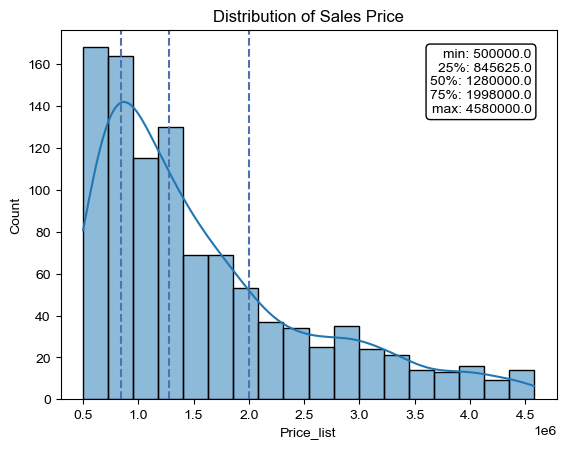

In [6]:
x = 'Price_list'
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Sales Price')
feature = df[x].fillna(df[x].mean())
sns.histplot(feature, kde=True)
des = df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(12,10)})

plt.show()

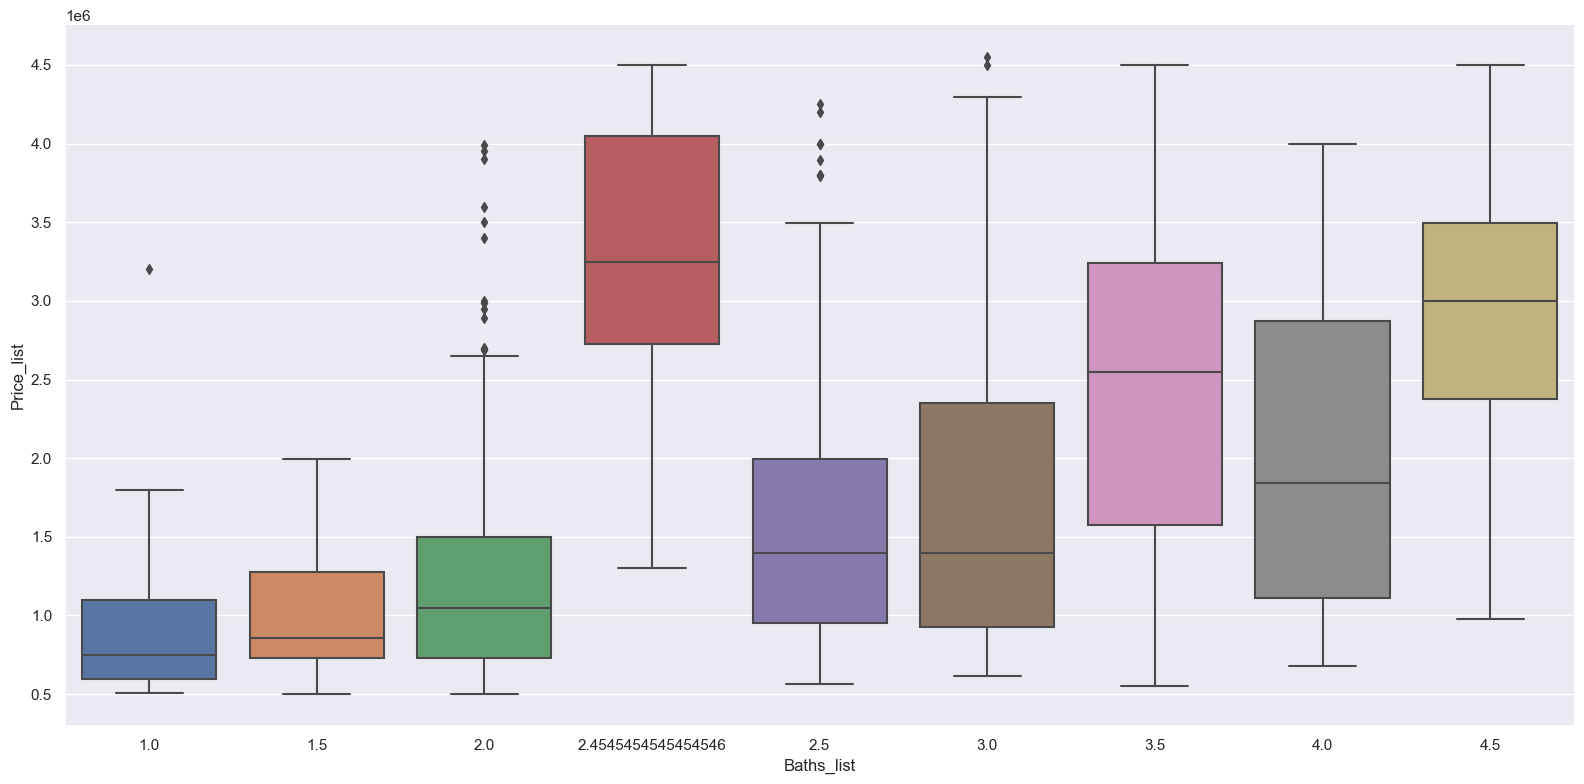

In [47]:
sns.catplot(x='Baths_list', y='Price_list', data=df, kind='box', height=8, aspect=2)
plt.show()


In [48]:
cat, num = "Baths_list", "Price_list"
model = smf.ols(num+' ~ '+cat, data=df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")


Anova F: the variables are Correlated (p-value: 0.0)


This indicates that the two variables are correlated with each other.

                             mean     median  size
Square_Footage_list                               
(572.0, 1100.0]      8.096965e+05   739000.0   100
(1100.0, 1278.4]     9.755798e+05   899500.0    96
(1278.4, 1414.7]     1.050418e+06   929000.0    98
(1414.7, 1608.2]     1.153932e+06  1100000.0    99
(1608.2, 1810.0]     1.314473e+06  1249000.0    99
(1810.0, 2001.6]     1.889927e+06  1620880.0    97
(2001.6, 2277.1]     1.726660e+06  1500000.0    99
(2277.1, 2613.6]     1.880022e+06  1692500.0    98
(2613.6, 3113.8]     2.316173e+06  2365000.0    98
(3113.8, 4394.0]     2.578645e+06  2650000.0    99


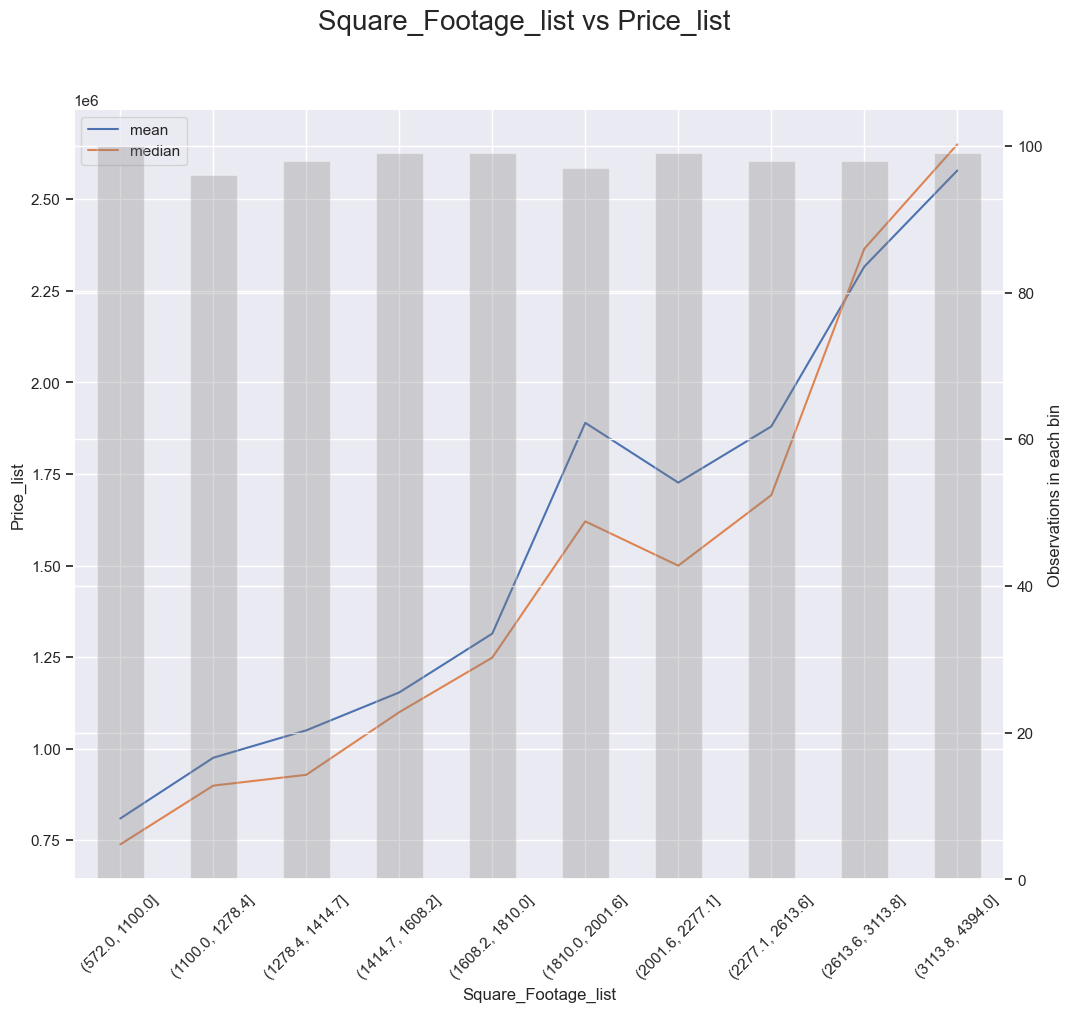

In [50]:
x, y = "Square_Footage_list", "Price_list"

#bin plot
dtf_noNan = df[df[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,
duplicates='drop')])[y].agg(['mean','median','size'])
print(groups)
fig, ax = plt.subplots()
fig.suptitle(x+" vs "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observations in each bin")
plt.show()

There is a positive relationship between Square_Footage_list and Price_list, as the mean and median Price_list values increase as Square_Footage_list increases. Also, there are a greater number of observations in the higher bins, suggesting that larger homes tend to have higher prices.

In [ ]:
### scatter plot
sns.jointplot(x=x, y=y, data=df, dropna=True, kind='reg')
plt.show()

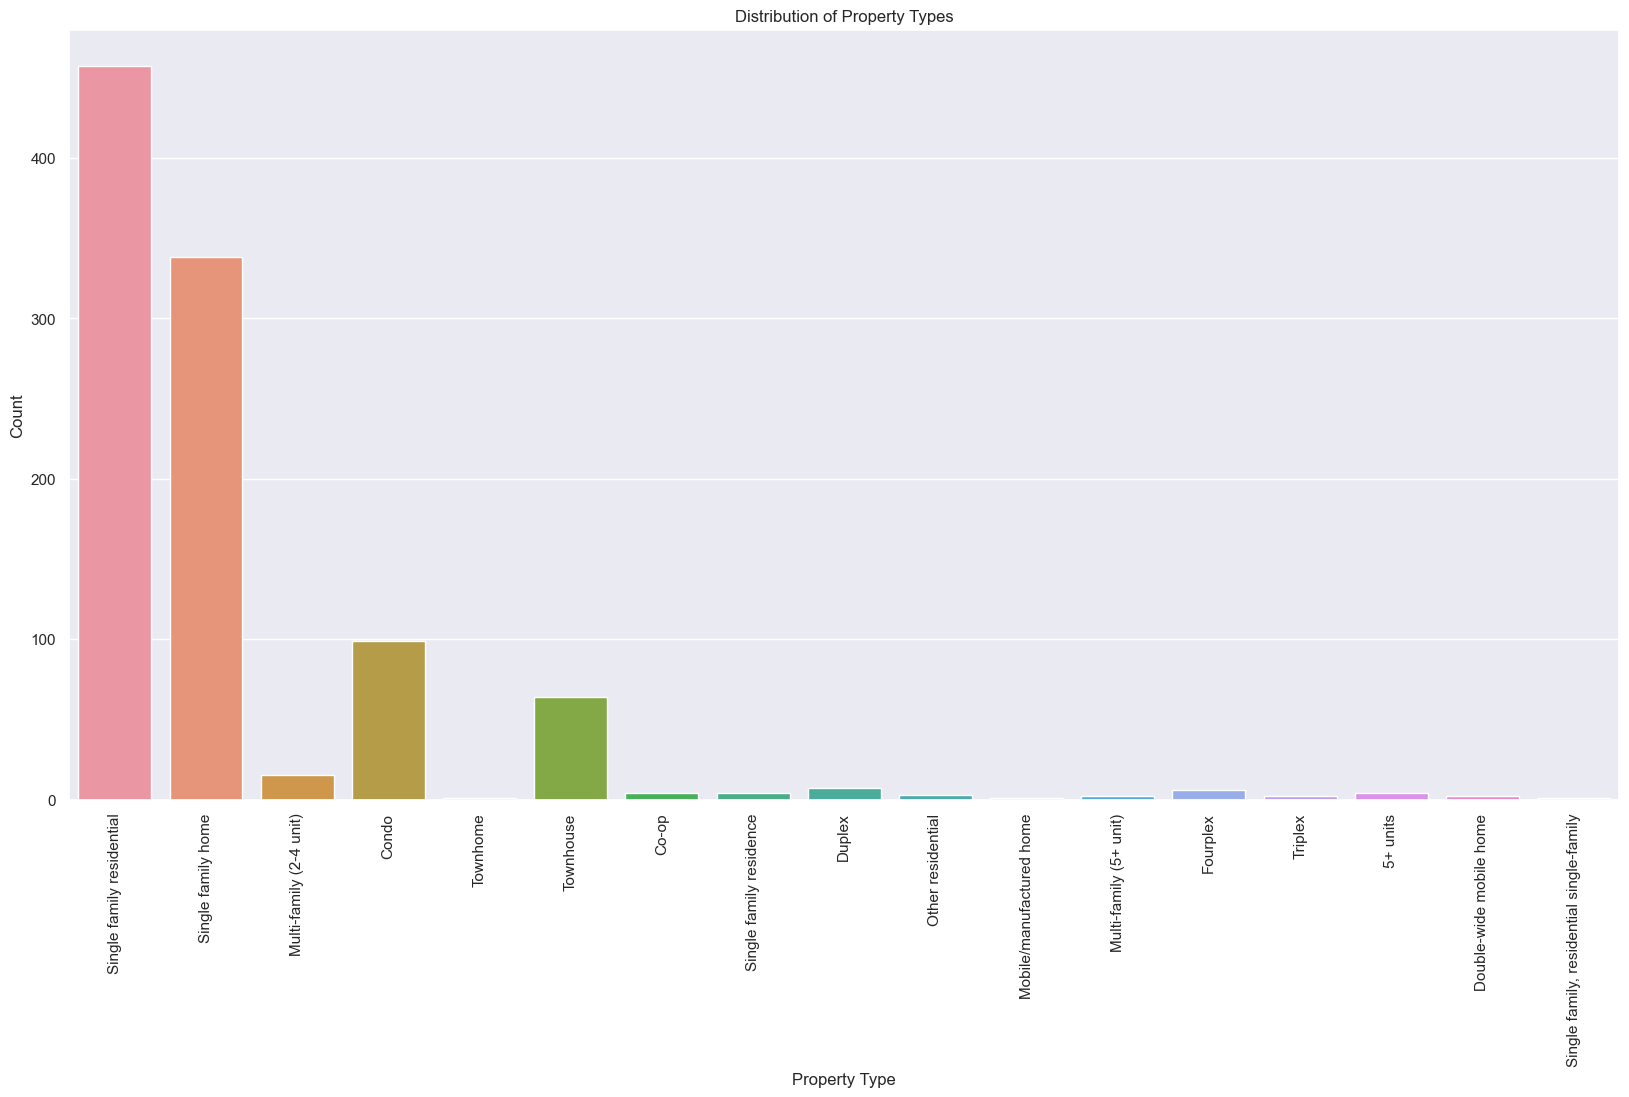

In [7]:
# property types count
plt.figure(figsize=(20,10))
sns.countplot(x='Property_Type_list', data=df)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

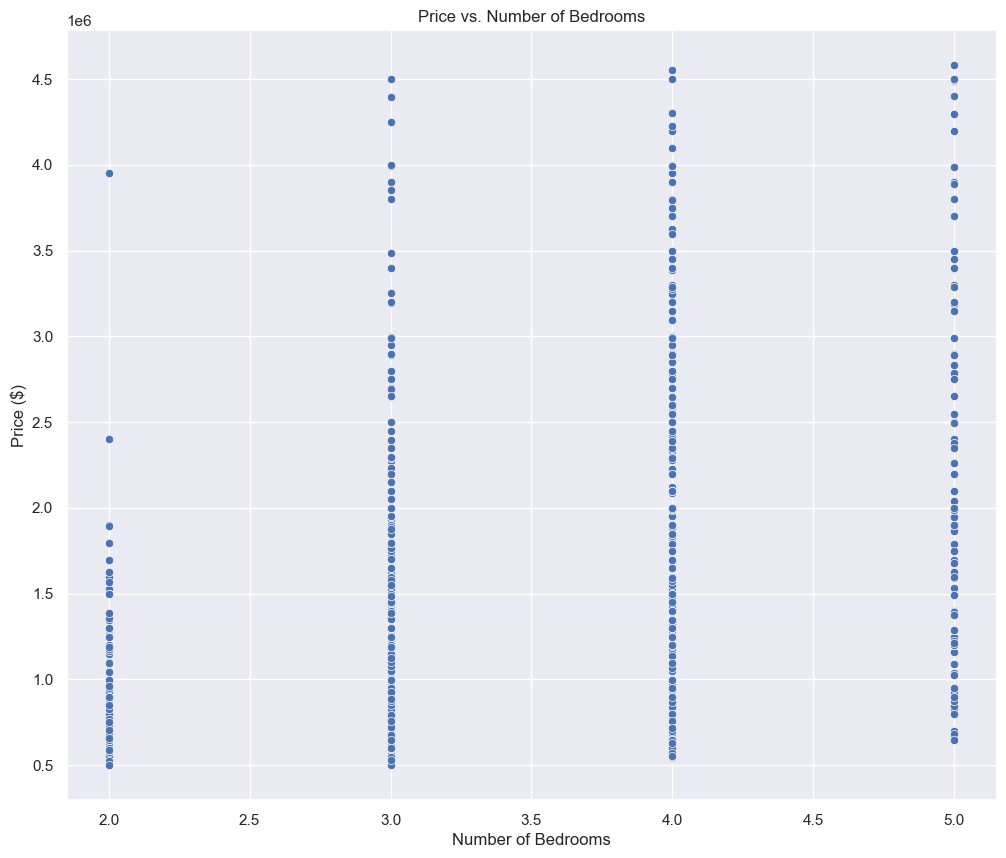

In [8]:
sns.scatterplot(x='Beds_list', y='Price_list', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()

In [9]:
model = smf.ols(formula='Price_list ~ Beds_list', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Price_list   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.23e-47
Time:                        22:40:04   Log-Likelihood:                -14369.
No. Observations:                 953   AIC:                         2.874e+04
Df Residuals:                     951   BIC:                         2.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.062e+04   1.11e+05     -0.547      0.5

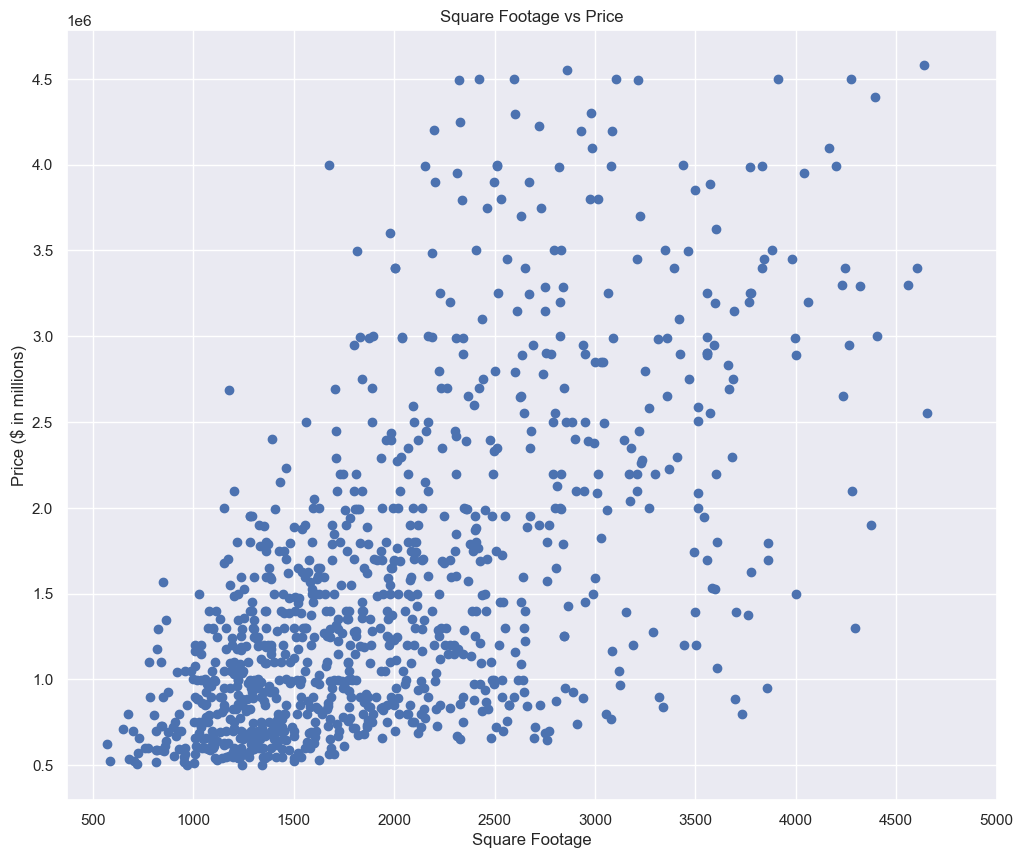

In [10]:
# scatter plot of sqft vs price
plt.scatter(df['Square_Footage_list'], df['Price_list'])

# Set the title and axis labels
plt.title('Square Footage vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price ($ in millions)')

# Set the x-axis ticks
plt.xticks(np.arange(500, 5500, 500))

# Show the plot
plt.show()

In [11]:
df['Price_per_sqft'] = df['Price_list'] / df['Square_Footage_list']
df

C:\Users\STSC\AppData\Local\Temp\ipykernel_17140\277340927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_sqft'] = df['Price_list'] / df['Square_Footage_list']


,County_list,City_list,Street_list,Zipcode_list,Property_Type_list,Status_list,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list,City,Price_per_sqft
State_list,,,,,,,,,,,,,,,,
Ca,Contra-costa-county,Antioch,1747 sanger peak way,94531,Single family residential,New,769000.0,2002,NaN,3.0,3080.0,4,14,12.0,Antioch,249.675325
Ca,Contra-costa-county,Discovery Bay,1700 anchorage way,94505,Single family residential,New,860000.0,1987,3.0,2.5,1668.0,8,32,38.0,Discovery bay,515.587530
Ca,Contra-costa-county,Discovery Bay,4396 cove ln,94505,Single family residential,Active,634900.0,1996,3.0,2.0,1564.0,8,20,33.0,Discovery bay,405.946292
Ca,Contra-costa-county,San Ramon,3356 middlebrook way,94582,Single family home,Active,2040000.0,2004,5.0,3.0,3173.0,9,12,23.0,San ramon,642.924677
Ca,Contra-costa-county,Lafayette,760 las trampas rd,94549,Single family residential,Active,2195000.0,1961,4.0,2.5,1732.0,9,3,30.0,Lafayette,1267.321016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ca,San-mateo-county,Portola Valley,130 corona way,94028,Single family home,Active,1950000.0,1961,3.0,2.0,1290.0,8,32,19.0,Portola valley,1511.627907
Ca,San-mateo-county,San Carlos,11 hilltop dr,94070,Single family home,Active,2288000.0,2022,4.0,3.0,1932.0,9,34,38.0,San carlos,1184.265010
Ca,San-mateo-county,Menlo Park,20 willow rd #12,94025,Condo,Active,898000.0,1965,NaN,1.0,786.0,8,76,97.0,Menlo park,1142.493639


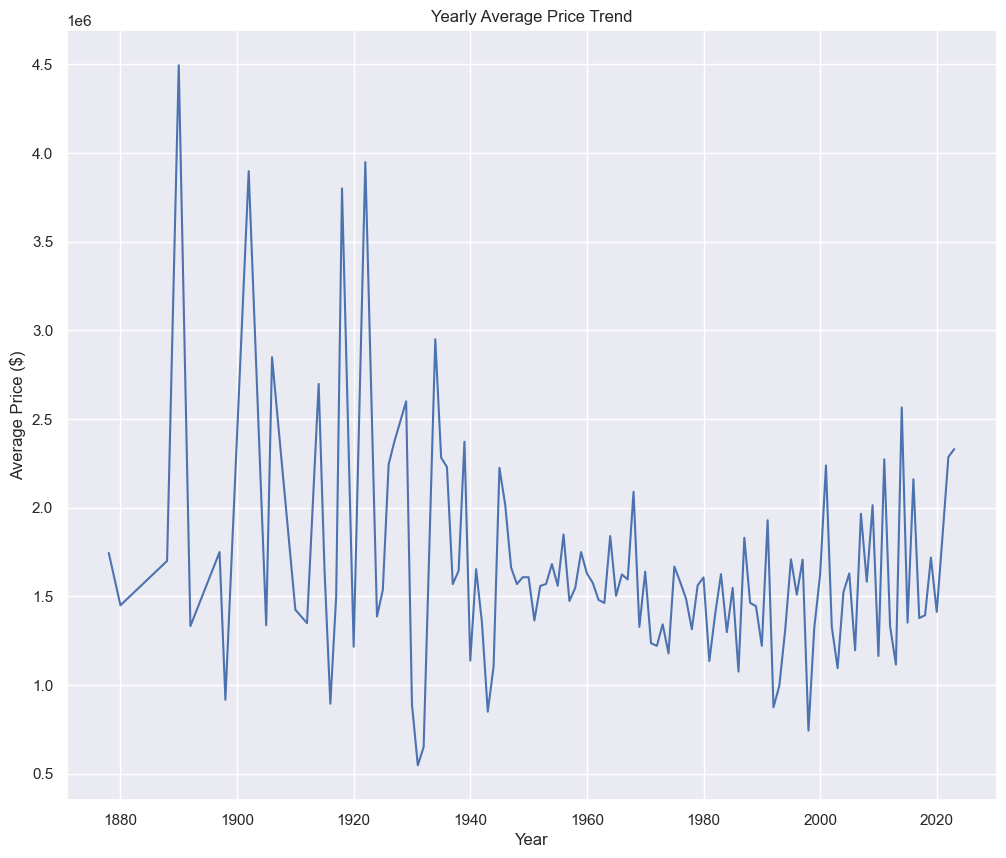

In [12]:
#group data by year
#calculate the average price for each year
yearly_avg_price = df.groupby('Year_Built_list')['Price_list'].mean()

plt.plot(yearly_avg_price.index, yearly_avg_price.values)
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.title('Yearly Average Price Trend')
plt.show()


In [13]:
# Calculate the appreciation ratio for each city
appreciation_ratio = df.groupby('City_list')['Price_list'].last() / df.groupby('City_list')['Price_list'].first()


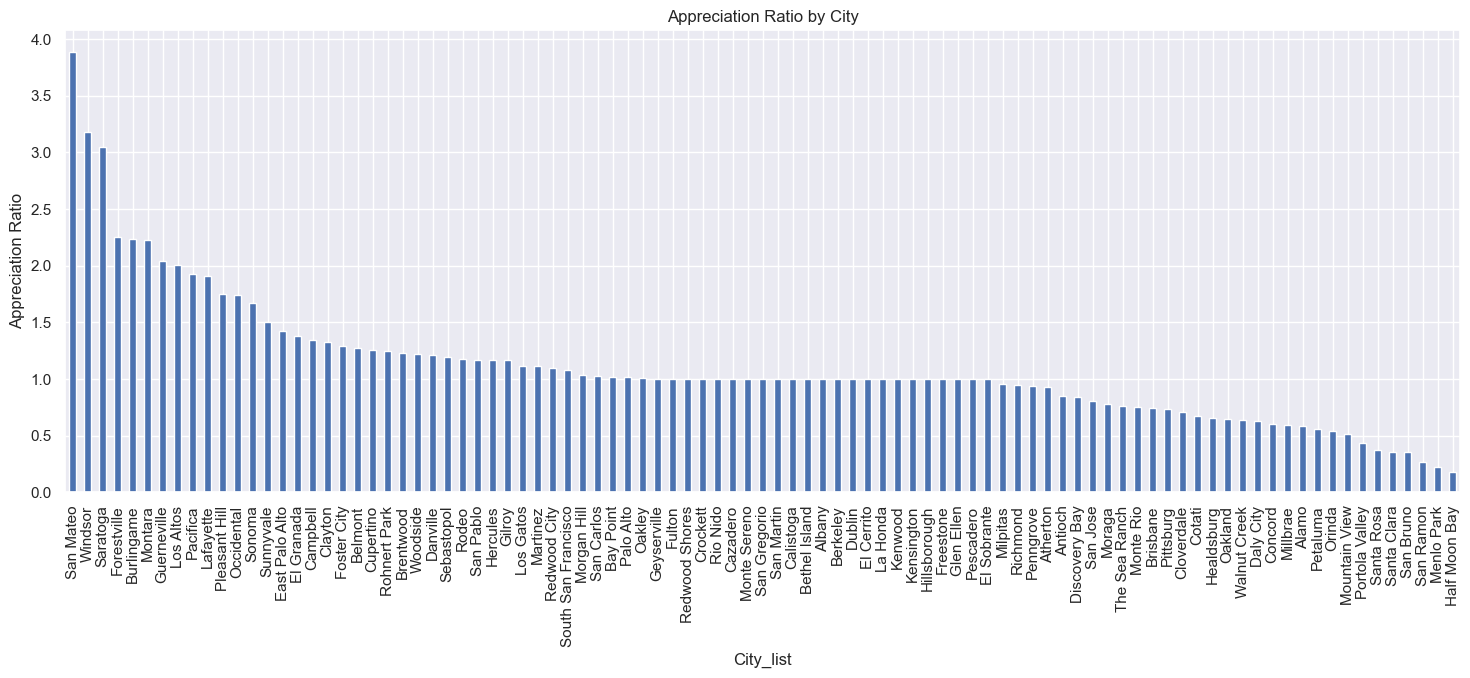

In [14]:
# Plot the appreciation ratio for each city
appreciation_ratio.sort_values(ascending=False).plot(kind='bar', figsize=(18, 6))
plt.title('Appreciation Ratio by City')
plt.ylabel('Appreciation Ratio')
plt.show()

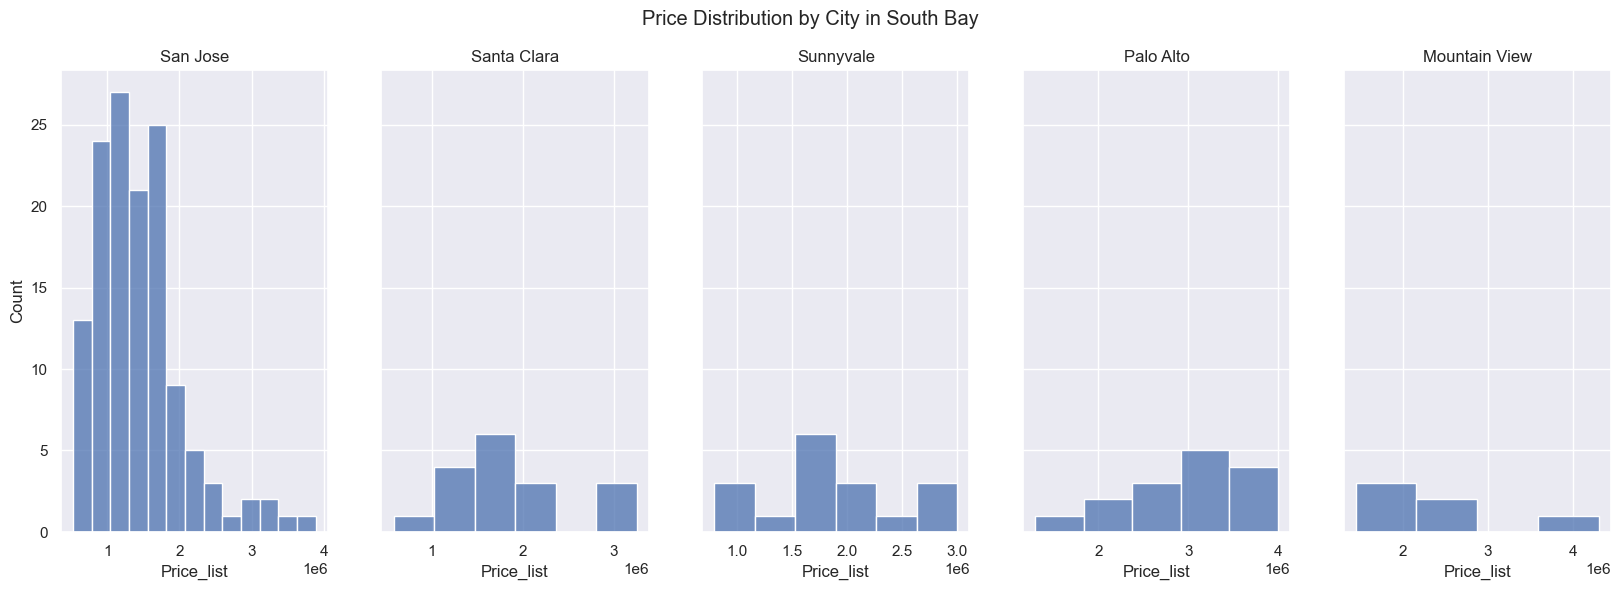

In [15]:
# Identify the top 5 cities in South Bay based on the number of listings
south_bay_cities = ['San Jose', 'Sunnyvale', 'Santa Clara', 'Mountain View', 'Palo Alto']
south_bay_df = df[df['City_list'].isin(south_bay_cities)]
top_south_bay_cities = south_bay_df.groupby('City_list')['Price_list'].count().sort_values(ascending=False).head().index.tolist()

# Plot the distribution of prices for the top 5 cities in South Bay
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)
for i, city in enumerate(top_south_bay_cities):
    sns.histplot(south_bay_df[south_bay_df['City_list'] == city]['Price_list'], ax=axes[i])
    axes[i].set_title(city)
plt.suptitle('Price Distribution by City in South Bay')
plt.show()


C:\Users\STSC\AppData\Local\Temp\ipykernel_17140\1574845877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_sqft'] = df['Price_list'] / df['Square_Footage_list']


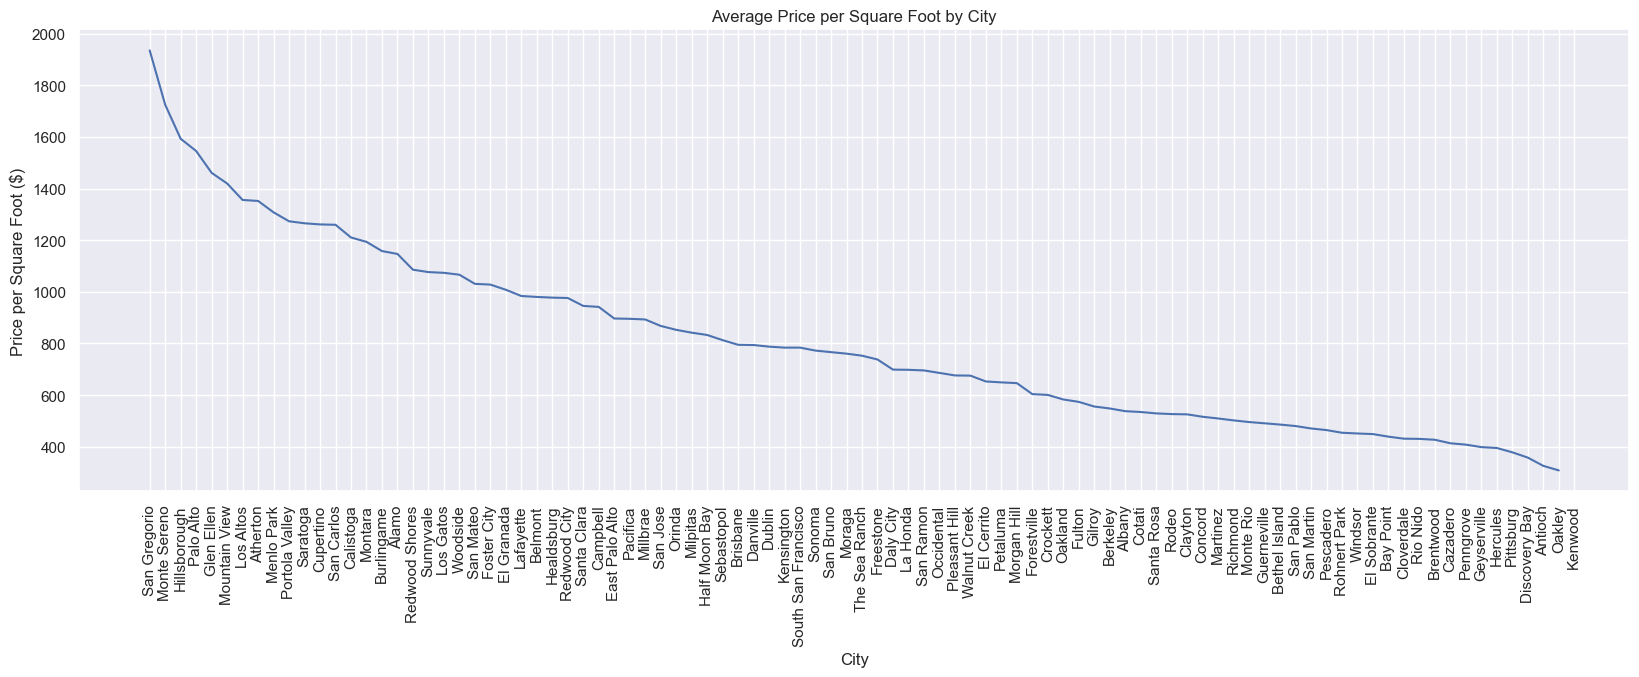

In [16]:
# Calculate the average price per square foot for each city
df['Price_per_sqft'] = df['Price_list'] / df['Square_Footage_list']
avg_price_per_sqft = df.groupby('City_list')['Price_per_sqft'].mean().sort_values(ascending=False)

# Plot the average price per square foot for each city as a line chart
fig = plt.figure(figsize=(20, 6))
plt.plot(avg_price_per_sqft.index, avg_price_per_sqft.values,)
plt.title('Average Price per Square Foot by City')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Price per Square Foot ($)')
plt.show()


In [17]:
# Filter out records with 0 or negative value in Square_Footage_list column
valid_df = df[df['Square_Footage_list'] > 0]

# Calculate max and min price per square foot
max_price_per_sqft = valid_df['Price_per_sqft'].max()
min_price_per_sqft = valid_df['Price_per_sqft'].min()

# Print results
print('Max Price per Square Foot:', max_price_per_sqft)
print('Min Price per Square Foot:', min_price_per_sqft)


Max Price per Square Foot: 2385.441527446301
Min Price per Square Foot: 214.09431939978563


C:\Users\STSC\AppData\Local\Temp\ipykernel_17140\3713469078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = kmeans.labels_


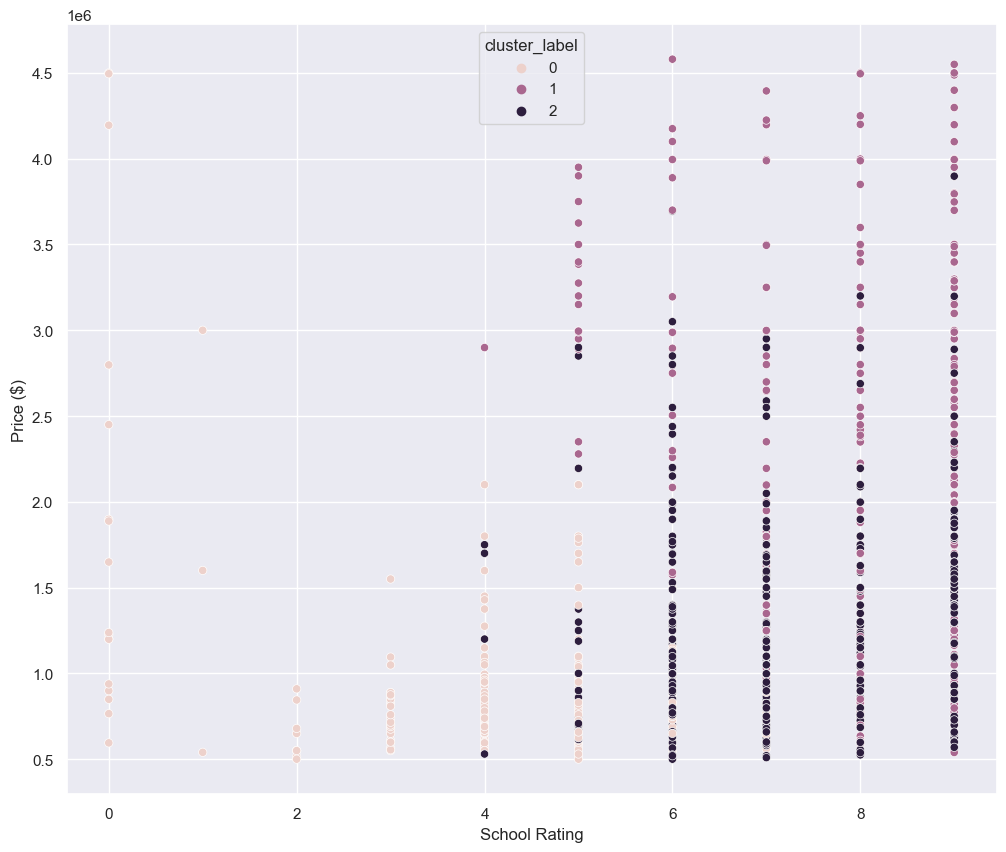

In [18]:
# Select variables for clustering
X = df[['Price_list', 'School_Rating_list', 'Walk_Score_list']]

# Normalize the variables using z-score normalization
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Set the number of clusters
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_norm)

# Add the cluster labels to the original dataframe
df['cluster_label'] = kmeans.labels_

# Visualize the clusters
sns.scatterplot(x='School_Rating_list', y='Price_list', hue='cluster_label', data=df)
plt.xlabel('School Rating')
plt.ylabel('Price ($)')
plt.show()


In [19]:
df.fillna(df.mean(), inplace=True)


C:\Users\STSC\AppData\Local\Temp\ipykernel_17140\1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
C:\Users\STSC\AppData\Local\Temp\ipykernel_17140\1920348818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


# Regression Analysis

In [20]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

# create an empty dictionary to store the column types
col_types = {}

# loop through each column in the dataframe
for col in df.columns:
    # use the utils_recognize_type() function to recognize the column type
    col_type = utils_recognize_type(df, col)
    # store the column type in the dictionary
    col_types[col] = col_type

# print the dictionary of column types
print(col_types)



{'County_list': 'cat', 'City_list': 'cat', 'Street_list': 'cat', 'Zipcode_list': 'cat', 'Property_Type_list': 'cat', 'Status_list': 'cat', 'Price_list': 'num', 'Year_Built_list': 'num', 'Beds_list': 'cat', 'Baths_list': 'cat', 'Square_Footage_list': 'num', 'School_Rating_list': 'cat', 'Walk_Score_list': 'num', 'Bike_Score_list': 'num', 'City': 'cat', 'Price_per_sqft': 'num', 'cluster_label': 'cat'}


Text(0.5, 1.0, 'pearson correlation')

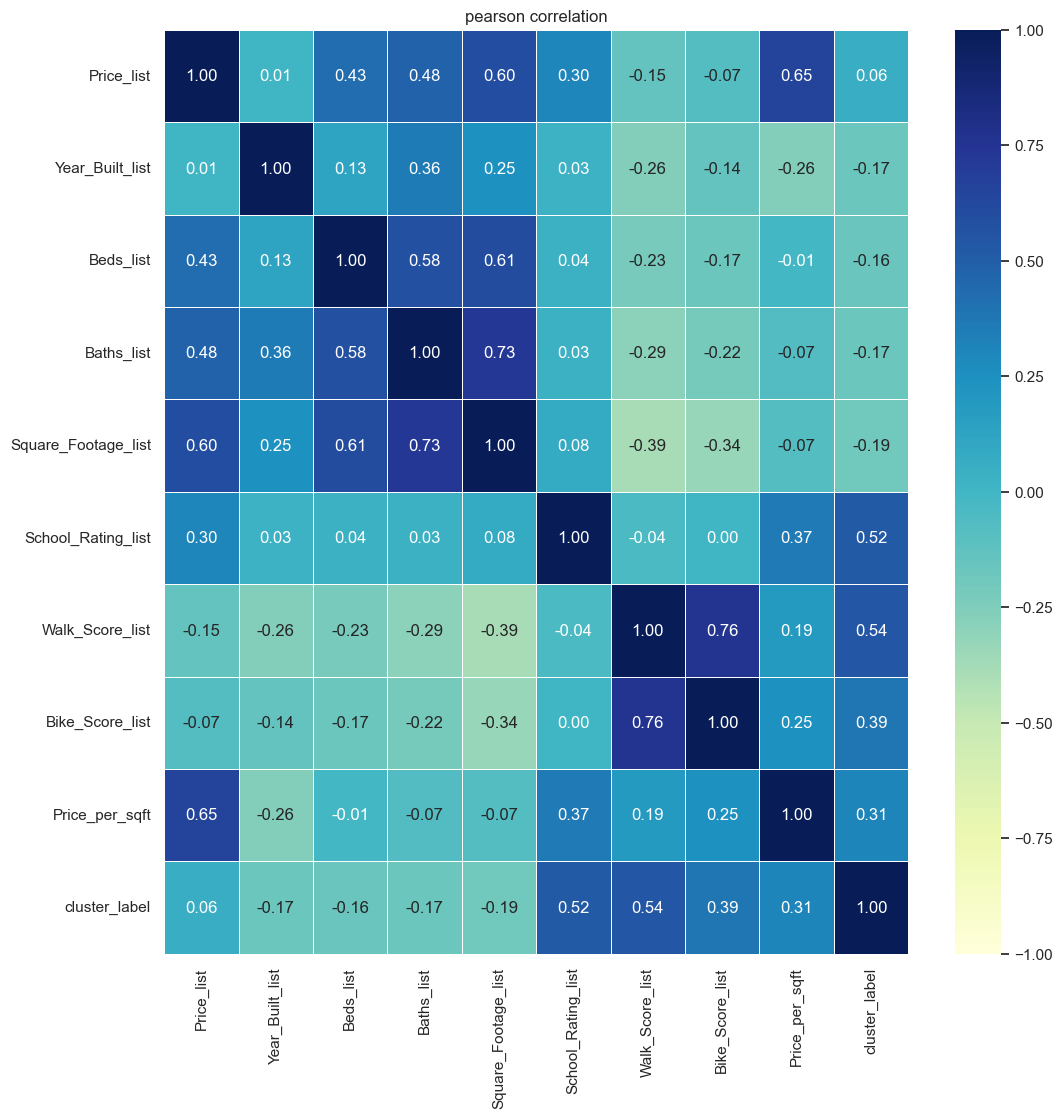

In [21]:
fig, ax = plt.subplots(figsize=(12,12))      
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax = ax)
plt.title("pearson correlation")


In [22]:
from scipy import stats

cols = ['Beds_list', 'Baths_list', 'Walk_Score_list', 'Square_Footage_list', 'Bike_Score_list', 'School_Rating_list', 'Year_Built_list']

z_thresh = 3

for col in cols:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < z_thresh)
    df = df[filtered_entries]


Number of rows with outliers: 7


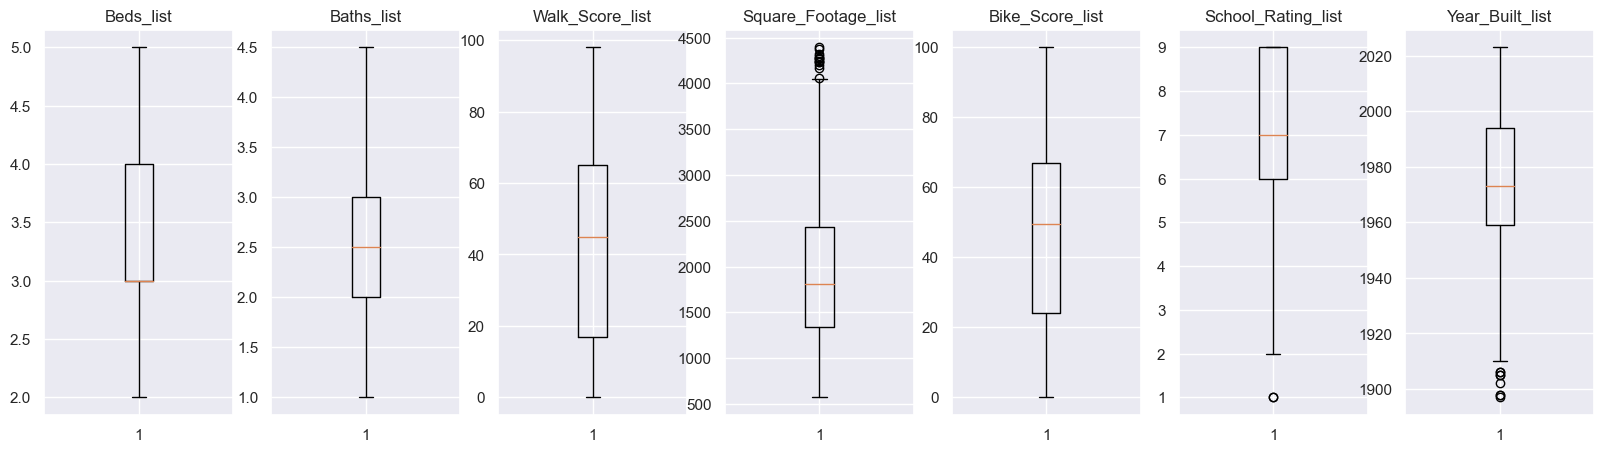

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Select the variables to check for outliers
cols = ['Beds_list', 'Baths_list', 'Walk_Score_list', 'Square_Footage_list', 'Bike_Score_list', 'School_Rating_list', 'Year_Built_list']

# Create box plots for each variable
fig, axs = plt.subplots(1, len(cols), figsize=(20,5))
for i, col in enumerate(cols):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# Calculate the z-scores for each variable
z_scores = stats.zscore(df[cols])

# Identify rows with outlier values
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Print the number of rows with outlier values
print("Number of rows with outliers:", outliers.sum())


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# drop 'Street_list' and 'Zipcode_list' columns
df = df.drop(['Street_list', 'Zipcode_list'], axis=1)

# convert categorical columns to numeric values
df['County_list'] = df['County_list'].astype('category').cat.codes
df['City_list'] = df['City_list'].astype('category').cat.codes
df['Property_Type_list'] = df['Property_Type_list'].astype('category').cat.codes
df['Status_list'] = df['Status_list'].astype('category').cat.codes
df['City'] = df['City'].astype('category').cat.codes

# select the categorical columns to be one-hot encoded
cat_cols = ['County_list', 'City_list', 'Property_Type_list', 'Status_list', 'City']

# create the column transformer
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), cat_cols)],
    remainder='passthrough'
)

# fit and transform the data
X = preprocessor.fit_transform(df.drop("Price_list", axis=1))
y = df["Price_list"].values


In [25]:
# select only the columns of object type
obj_cols = df.select_dtypes(include='object').columns.tolist()

# print out the columns with non-numeric values
print(obj_cols)


[]


In [26]:
from sklearn.preprocessing import OneHotEncoder

# create an instance of OneHotEncoder
encoder = OneHotEncoder()

# fit the encoder on the categorical data
encoder.fit(df[["County_list"]])

# transform the categorical data into one-hot encoded form
one_hot_encoded_data = encoder.transform(df[["County_list"]])


    IMPORTANCE             VARIABLE
12    0.506312       Price_per_sqft
7     0.468987  Square_Footage_list
10    0.006187      Bike_Score_list
6     0.005477           Baths_list
2     0.004316   Property_Type_list
13    0.003133        cluster_label
9     0.001612      Walk_Score_list
5     0.001409            Beds_list
4     0.001405      Year_Built_list
1     0.001017            City_list
11    0.000074                 City
8     0.000047   School_Rating_list
0     0.000022          County_list
3     0.000000          Status_list


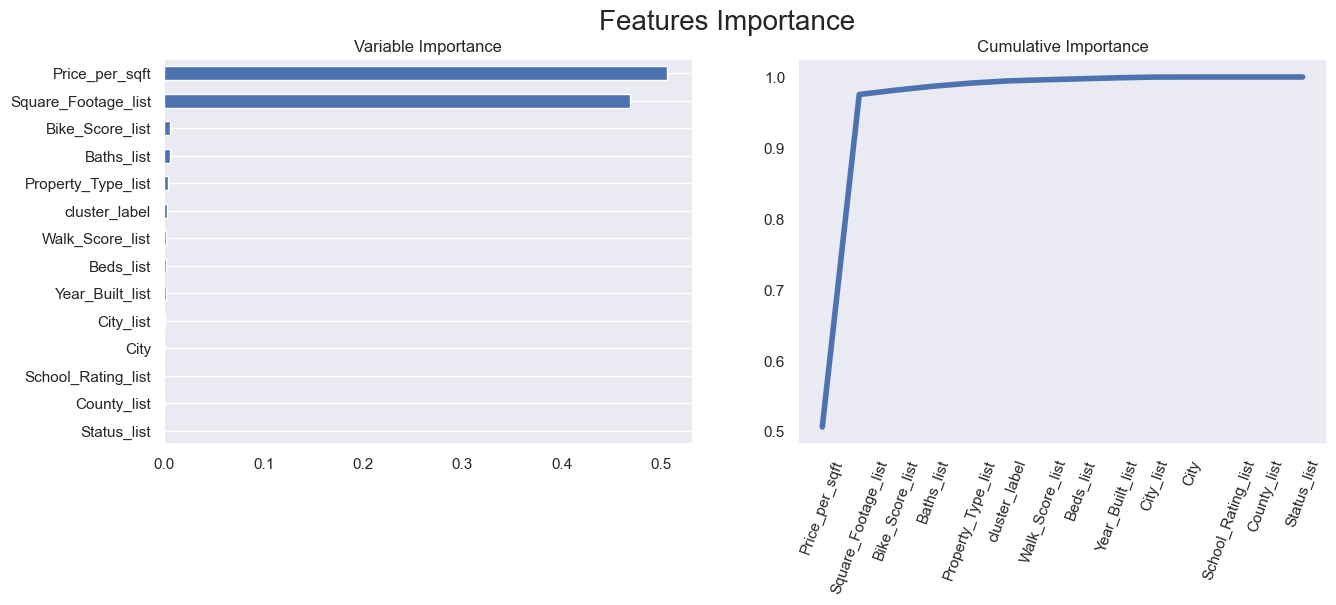

In [27]:
X = df.drop("Price_list", axis=1).values
y = df["Price_list"].values
feature_names = df.drop("Price_list", axis=1).columns.tolist()

## call model
model = ensemble.GradientBoostingRegressor()

## Importance
model.fit(X,y)
importances = model.feature_importances_

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
print(dtf_importances)

dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 5))

fig.suptitle("Features Importance", fontsize=20)

# Bar plot
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[0].title.set_text('Variable Importance')

# Cumulative importance
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
ax[1].title.set_text('Cumulative Importance')
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.show()


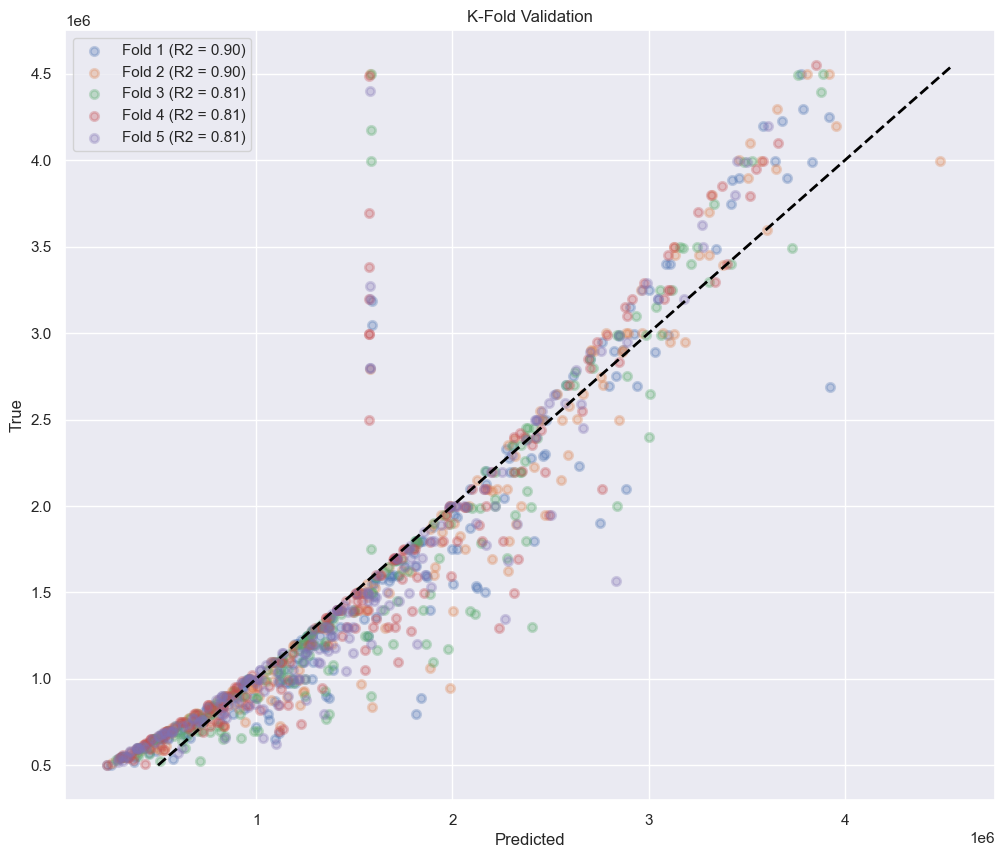

In [37]:
selected_predictors = ['Square_Footage_list', 'Price_per_sqft']
X_train = df[selected_predictors].values
y_train = df["Price_list"].values

## call model
model = linear_model.LinearRegression()

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()


Based on the R2 scores for each fold of the K-fold cross-validation, this model achieved relatively high R2 scores for each fold, indicating a good fit to the data.

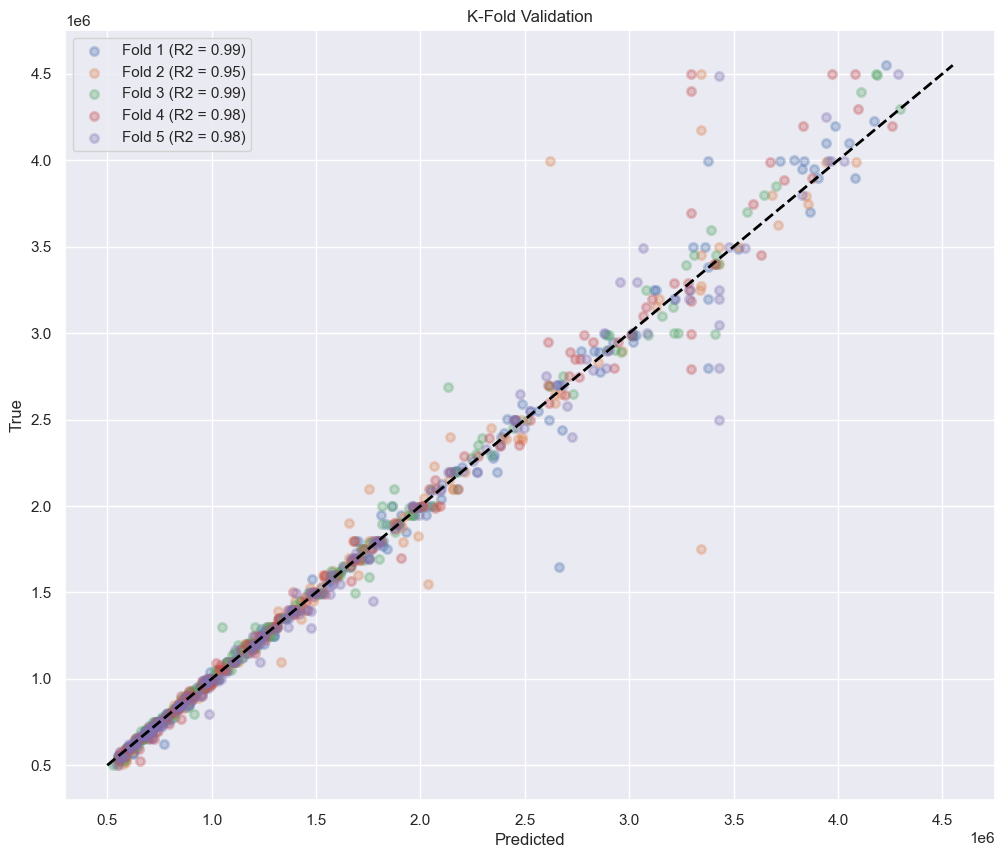

In [38]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt

## select predictors
selected_predictors = ['Square_Footage_list', 'Price_per_sqft']

## prepare data
X_train = df[selected_predictors].values
y_train = df["Price_list"].values

## call model
model = ensemble.RandomForestRegressor()

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()


Random Forest model performs well compared to linear regression model based on the R2 scores for each fold in the 5-fold cross-validation

In [39]:
## split data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[selected_predictors], df["Price_list"], test_size=0.2, random_state=42)

## call model
model = RandomForestRegressor(n_estimators=100)

## fit model on training data
model.fit(X_train, y_train)

## make predictions on test data
predicted = model.predict(X_test)

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))


R2 (explained variance): 0.97
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.03
Mean Absolute Error (Σ|y-pred|/n): 61,255
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 164,323
Max Error: 1,326,009


The R2 score of 0.97 indicates that 97% of the variance in the target variable is explained by the model. The mean absolute error of 61,255 indicates that on average the model's predictions are off by this amount. The root mean squared error of 164,323 measures the square root of the average of the squared differences between the predicted and true values. Finally, the max error of 1,326,009 indicates the largest difference between the predicted and true values.

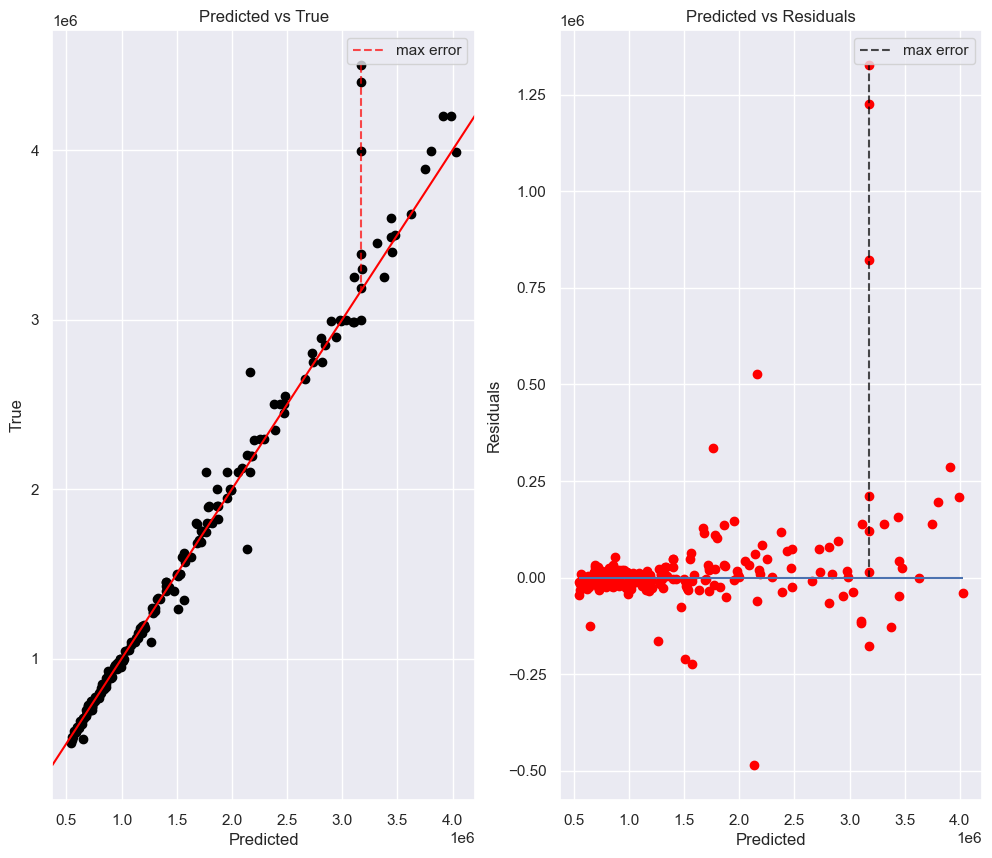

In [40]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()


C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


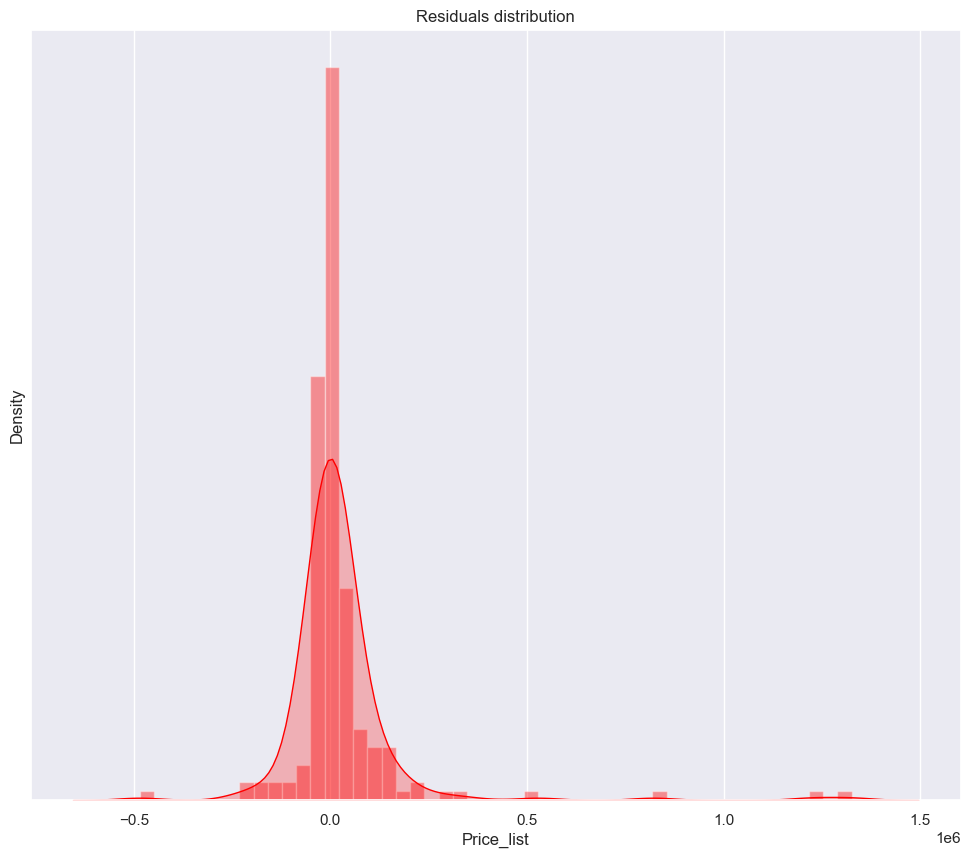

In [41]:
#Plot residuals distribution
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

In [42]:

print("True:", "{:,.0f}".format(y_test[0]), "--> Pred:", "{:,.0f}".format(predicted[0]))

True: 2,988,000 --> Pred: 3,105,992
